In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from numbers import Number
from pandas.api.types import is_numeric_dtype
import math
import sklearn
from sklearn.metrics.cluster import homogeneity_score

In [2]:
df = pandas.read_csv("./dataset_train.csv")

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
filtered_dataframe = df.select_dtypes(include=numerics)
filtered_dataframe.pop("Index")

0          0
1          1
2          2
3          3
4          4
        ... 
1595    1595
1596    1596
1597    1597
1598    1598
1599    1599
Name: Index, Length: 1600, dtype: int64

In [4]:

    def get_cond(cond_col, cond_val, get_col, dropna=True):
        """
        Summary
        -------
        Function to access values in MyDataSet instance given a condition.
        Parameters
        ----------
        self: MyDataSet instance
        cond_col: 'str'
            Column name to condition on.
        cond_val: 'str' or 'int' or 'float'
            Value of cond_col to condition on (equality).
        get_col: 'str'
            Column name to get.
        dropna: 'bool', default True
            Remove nan values from output if True.
        Returns
        --------
        'list'
        List of values from get_col conditioned on cond_col values.
        """
        idx = [i for i, x in enumerate(df[cond_col]) if x == cond_val]
        if dropna is True:
            return [df[get_col][x] for x in idx if
                    str(df[get_col][x]) != 'nan']
        else:
            return [df[get_col][x] for x in idx]

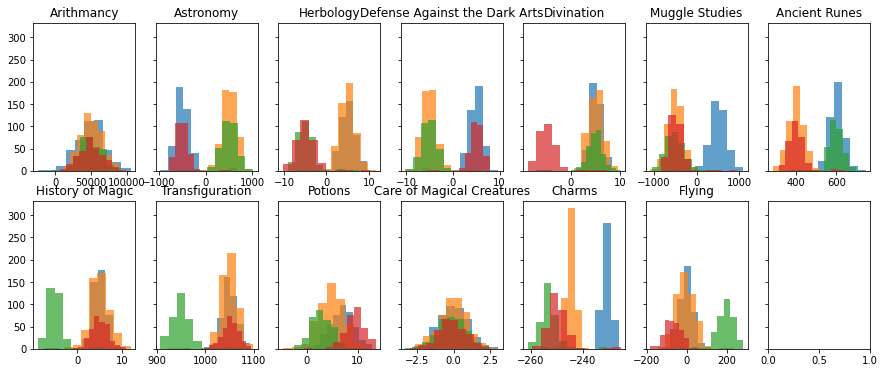

In [5]:
        class_list = [key for key in df.keys() if all(isinstance(x, (float)) for x in df[key])]
        num_cols = int(len(class_list)/2) + 1
        fig, axes = plt.subplots(2, num_cols, sharey=True, figsize=(15, 6))
        i, j = [0, 0]
        for class_name in class_list:
            for house in set(df['Hogwarts House']):
                axes[i, j].hist(get_cond('Hogwarts House', house, class_name), alpha=0.7)
                axes[i, j].set_title(class_name, fontsize=12)
            if j < num_cols - 1:
                j += 1
            else:
                i += 1
                j = 0

        plt.show()

In [22]:
#print(class_list)
#print(class_list[1])
lst = []
for class_name in class_list:
    lst.append(df[class_name])
print (lst[1])

0      -487.886086
1      -552.060507
2      -366.076117
3       697.742809
4       436.775204
           ...    
1595    354.280086
1596    367.531174
1597    544.018925
1598    453.676219
1599    688.911989
Name: Astronomy, Length: 1600, dtype: float64


In [24]:
homogeneity_score(lst[1], lst[2])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').